In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=14,
        )
    
def autolabel_h(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(
            "%.2f" % width,
            xy=(width, rect.get_y() + rect.get_height() / 2),
            xytext=(18, -1),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="center",
            size=13,
        )
SAVEPATH = '.'

# GPUinfo

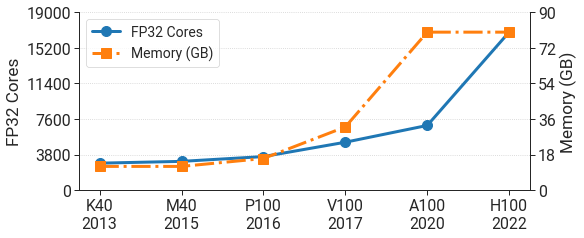

In [15]:
SAVEPATH = '.'
cmp = sns.color_palette("tab10")

def gpuInfo(save=False):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(8, 3.2))
    # sm = np.array([15, 24, 56, 80, 108, 140])
    # memory_cap = np.array([12, 12, 16, 32, 80, 100])

    df = pd.read_csv('./gpu.csv', index_col=0)
    sm = df['FP32 Cores']
    memory_cap = df['Memory (GB)']

    x = np.arange(1, 7)
    lns1 = ax.plot(x, sm, label=df.columns[2], marker="o", linewidth=3, linestyle='-')
    ax.set_ylabel(f"FP32 Cores")
    # ax.set_yticks([0, 3750, 7500, 11250, 15000])
    ax.set_yticks(np.linspace(0, 19000, 6))
    ax.set_ylim(0, 19000)

    ticklabel = ['K40\n2013', 'M40\n2015', 'P100\n2016', 'V100\n2017', 'A100\n2020', 'H100\n2022']
    ax.set_xticks(x)
    ax.set_xticklabels(ticklabel)
    # ax.set_yscale("log")
    
    ax.grid(axis="y", linestyle=":")

    ax1 = ax.twinx()
    lns2 = ax1.plot(x, memory_cap, label=df.columns[1], color=cmp[1], marker="s", linewidth=3, linestyle="-.")
    ax1.set_ylabel(f"Memory (GB)")
    ax1.set_ylim(0, 90)
    ax1.set_yticks(np.linspace(0, 90, 6))

    # Combine plot labels
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=2, fontsize=14)
    sns.despine(top=True,right=False, left=False, bottom=False,)

    if save:
        fig.savefig(f"{SAVEPATH}/gpuinfo.pdf", bbox_inches="tight")


gpuInfo(save=True)

# CDF Trace

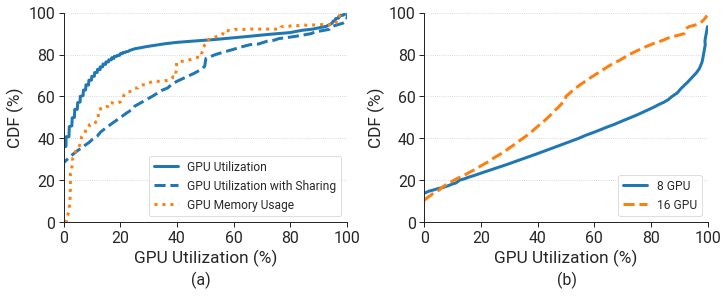

In [20]:
SAVEPATH = '.'
cmp = sns.color_palette("tab10")

def trace_analysis(save=False):
    grid_params=dict(width_ratios=[1, 1])
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(10, 4))

    df = pd.read_csv('./trace.csv')
    ali_share = df.loc[:, ['ali_share_x', 'ali_share_y']].dropna()
    ali_gmem = df.loc[:, ['ali_gpumem_x', 'ali_gpumem_y']].dropna()
    ali_gutil = df.loc[:, ['ali_gpuutil_x', 'ali_gpuutil_y']].dropna()
    msft_8 = df.loc[:, ['msft_8gpu_x', 'msft_8gpu_y']].dropna()
    msft_16 = df.loc[:, ['msft_16gpu_x', 'msft_16gpu_y']].dropna()

    ax1.plot(ali_gutil['ali_gpuutil_x'], ali_gutil['ali_gpuutil_y'], label='GPU Utilization', linewidth=3, color=cmp[0])
    ax1.plot(ali_share['ali_share_x'], ali_share['ali_share_y'], label='GPU Utilization with Sharing', linewidth=3, linestyle='--', color=cmp[0])
    ax1.plot(ali_gmem['ali_gpumem_x'], ali_gmem['ali_gpumem_y'], label='GPU Memory Usage', linewidth=3, linestyle=':', color=cmp[1])

    ax1.set_xlabel(f"GPU Utilization (%)")
    ax1.set_ylabel(f"CDF (%)")
    ax1.set_ylim(0, 100)
    # ax1.set_xticks()
    ax1.set_xlim(0, 100)
    ax1.set_xticks(ax1.get_xticks().tolist())
    ax1.set_xticklabels([0, 20, 40, 60, 80, 100])
    ax1.grid(axis="y", linestyle=":")
    ax1.legend(loc=0, fontsize=12)
    sns.despine()

    ax2.plot(msft_8['msft_8gpu_x'], msft_8['msft_8gpu_y'], label='8 GPU', linewidth=3)
    ax2.plot(msft_16['msft_16gpu_x'], msft_16['msft_16gpu_y'], label='16 GPU', linewidth=3, linestyle='--')

    ax2.set_xlabel(f"GPU Utilization (%)")
    ax2.set_ylabel(f"CDF (%)")
    ax2.set_ylim(0, 100)
    # ax1.set_xticks()
    ax2.set_xlim(0, 100)
    ax2.set_xticks(ax2.get_xticks().tolist())
    ax2.set_xticklabels([0, 20, 40, 60, 80, 100])
    ax2.grid(axis="y", linestyle=":")
    ax2.legend(loc=4, fontsize=12)
    sns.despine()

    ax1.text(0.45, -0.3, "(a)", transform=ax1.transAxes, size=16)
    ax2.text(0.47, -0.3, "(b)", transform=ax2.transAxes, size=16)

    if save:
        fig.savefig(f"{SAVEPATH}/trace_analysis.pdf", bbox_inches="tight")


trace_analysis(save=True)

# BS-AMP

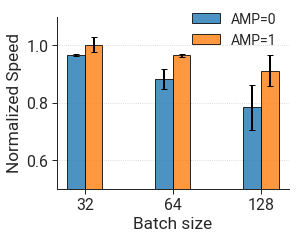

In [21]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# batchsize = 64
SAVEPATH = '.'
cmp = sns.color_palette("tab10")
def bsamp(save=False):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4, 3.2))
    speed = pd.read_csv(f"./bs_amp_affect.csv", index_col=0)
    s_amp0 = speed[speed['amp']==0].copy()
    s_amp1 = speed[speed['amp']==1].copy()

    x = np.arange(1, 4)
    width = 0.2
    error_params=dict(elinewidth=2, ecolor='k', capsize=3)
    p1 = ax.bar(x - width/2, s_amp0.loc[:,'mean_s'], yerr=abs(s_amp0['avg_s1']-s_amp0['avg_s2']), error_kw=error_params, width=width, label='AMP=0', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
    p2 = ax.bar(x + width/2, s_amp1.loc[:,'mean_s'], yerr=abs(s_amp1['avg_s1']-s_amp1['avg_s2']), error_kw=error_params, width=width, label='AMP=1', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

    ax.set_ylabel(f"Normalized Speed")
    ax.set_xticks(x)
    ax.set_xlabel(f"Batch size")
    ax.set_xticklabels(s_amp1['batchsize'])
    ax.set_ylim(0.5, 1.1)
    # autolabel(p1, ax)
    # autolabel(p2, ax)
    sns.despine()

    ax.grid(axis="y", linestyle=":")

    legend1 = ax.legend(
        loc=1,
        # handles=[A, B],
        bbox_to_anchor=(1, 1.1),
        ncol=1,
        frameon=False,
        fancybox=True,
        shadow=True,
        fontsize=14,
    )

    if save:
        fig.savefig(f"{SAVEPATH}/bsamp.pdf", bbox_inches="tight")

bsamp(save=True)

# CDF Trace + BS-AMP 

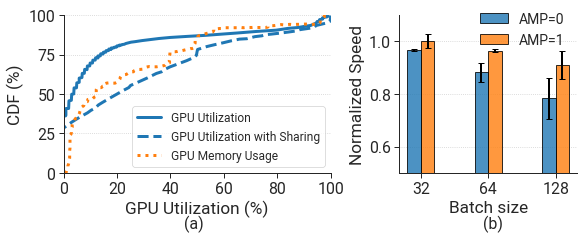

In [67]:
SAVEPATH = '.'
cmp = sns.color_palette("tab10")

# def trace_analysis(save=False):
grid_params=dict(width_ratios=[1.5, 1])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.2))

df = pd.read_csv('./trace.csv')
ali_share = df.loc[:, ['ali_share_x', 'ali_share_y']].dropna()
ali_gmem = df.loc[:, ['ali_gpumem_x', 'ali_gpumem_y']].dropna()
ali_gutil = df.loc[:, ['ali_gpuutil_x', 'ali_gpuutil_y']].dropna()
msft_8 = df.loc[:, ['msft_8gpu_x', 'msft_8gpu_y']].dropna()
msft_16 = df.loc[:, ['msft_16gpu_x', 'msft_16gpu_y']].dropna()

ax1.plot(ali_gutil['ali_gpuutil_x'], ali_gutil['ali_gpuutil_y'], label='GPU Utilization', linewidth=3, color=cmp[0])
ax1.plot(ali_share['ali_share_x'], ali_share['ali_share_y'], label='GPU Utilization with Sharing', linewidth=3, linestyle='--', color=cmp[0])
ax1.plot(ali_gmem['ali_gpumem_x'], ali_gmem['ali_gpumem_y'], label='GPU Memory Usage', linewidth=3, linestyle=':', color=cmp[1])

ax1.set_xlabel(f"GPU Utilization (%)")
ax1.set_ylabel(f"CDF (%)")
ax1.set_ylim(0, 100)
# ax1.set_xticks()
ax1.set_xlim(0, 100)
ax1.set_xticks(ax1.get_xticks().tolist())
# ax1.set_xticklabels([0, 20, 40, 60, 80, 100])
ax1.grid(axis="y", linestyle=":")
ax1.legend(loc=0, fontsize=12)
sns.despine()

speed = pd.read_csv(f"./bs_amp_affect.csv", index_col=0)
s_amp0 = speed[speed['amp']==0].copy()
s_amp1 = speed[speed['amp']==1].copy()

x = np.arange(1, 4)
width = 0.2
error_params=dict(elinewidth=2, ecolor='k', capsize=3)
p1 = ax2.bar(x - width/2, s_amp0.loc[:,'mean_s'], yerr=abs(s_amp0['avg_s1']-s_amp0['avg_s2']), error_kw=error_params, width=width, label='AMP=0', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
p2 = ax2.bar(x + width/2, s_amp1.loc[:,'mean_s'], yerr=abs(s_amp1['avg_s1']-s_amp1['avg_s2']), error_kw=error_params, width=width, label='AMP=1', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

ax2.set_ylabel(f"Normalized Speed")
ax2.set_xticks(x)
ax2.set_xlabel(f"Batch size")
ax2.set_xticklabels(s_amp1['batchsize'])
ax2.set_ylim(0.5, 1.1)
# autolabel(p1, ax)
# autolabel(p2, ax)
sns.despine()

ax2.grid(axis="y", linestyle=":")

legend1 = ax2.legend(
    loc=1,
    # handles=[A, B],
    bbox_to_anchor=(1, 1.1),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

ax1.text(0.45, -0.35, "(a)", transform=ax1.transAxes, size=16)
ax2.text(0.47, -0.35, "(b)", transform=ax2.transAxes, size=16)

save = True
if save:
    fig.savefig(f"{SAVEPATH}/trace+bs_amp.pdf", bbox_inches="tight")


# trace_analysis(save=False)

# Different colocate pairs

NameError: name 'SAVEPATH' is not defined

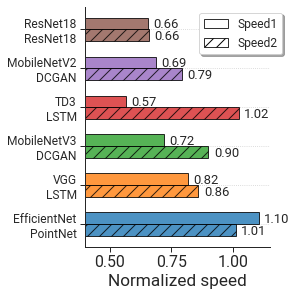

In [4]:
# batchsize = 64, amp = 0
def colocate_pairs(save=False):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4, 4))
    speed = pd.read_csv(f"./pair_compare.csv", index_col=0)

    y = np.arange(1, 7)
    width = 0.3
    # p1 = ax.barh(y + width/2, speed['speed1'], height=width, label='speed1', alpha=0.8, linewidth=1, edgecolor="k", 
    #     color=[cmp[0],cmp[2],cmp[4],cmp[6],cmp[7],cmp[8]])
    # p2 = ax.barh(y - width/2, speed['speed2'], height=width, label='speed2', alpha=0.8, linewidth=1, edgecolor="k", hatch="//",
    #     color=[cmp[1],cmp[3],cmp[5],cmp[3],cmp[5],cmp[9]])

    p1 = ax.barh(y + width/2, speed['speed1'], height=width, label='Speed1', alpha=0.8, linewidth=1, edgecolor="k", 
        color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[5]])
    p2 = ax.barh(y - width/2, speed['speed2'], height=width, label='Speed2', alpha=0.8, linewidth=1, edgecolor="k", hatch="//",
        color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[5]])


    yticklabel = speed['model1']+'\n'+speed['model2']
    #ax.set_ylabel(f"Colocated models")
    ax.set_yticks(y)
    ax.set_yticklabels(yticklabel, fontsize=12)
    # ax.invert_yaxis()
    ax.set_xlabel(f"Normalized speed")
    ax.set_xlim(0.4, 1.15)
    autolabel_h(p1, ax)
    autolabel_h(p2, ax)
    sns.despine()

    ax.grid(axis="y", linestyle=":")

    A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")
    B = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Speed2")

    legend1 = ax.legend(
        loc=0,
        handles=[A, B],
        bbox_to_anchor=(1.1, 1),
        ncol=1,
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=12,
    )
    if save:
        fig.savefig(f"{SAVEPATH}/colocate_pairs.pdf", bbox_inches="tight")

colocate_pairs(save=True)

# Self-colocate + resnet18 colocate others
version 1

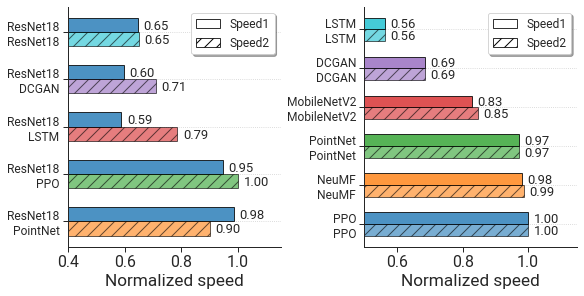

In [25]:
# batchsize = 64, amp = 0
def pairs(save=False):
    grid_params=dict(width_ratios=[1, 1])
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 4))
    speed = pd.read_csv(f"./resnet18_colocate.csv", index_col=None)
    speed_self = pd.read_csv(f"./selfcolocate.csv", index_col=None)

    for i in range(len(speed)):
        if speed.loc[i, 'speed1'] > 1:
            speed.loc[i, 'speed1'] = 1
        if speed.loc[i, 'speed2'] > 1:
            speed.loc[i, 'speed2'] = 1

    for i in range(len(speed_self)):
        if speed_self.loc[i, 'speed1'] > 1:
            speed_self.loc[i, 'speed1'] = 1
        if speed_self.loc[i, 'speed2'] > 1:
            speed_self.loc[i, 'speed2'] = 1

    y = np.arange(1, 6)
    width = 0.3

    p1 = ax1.barh(y + width/2, speed['speed1'], height=width, label='Speed1', alpha=0.8, linewidth=1, edgecolor="k", 
        color=[cmp[0]])
    p2 = ax1.barh(y - width/2, speed['speed2'], height=width, label='Speed2', alpha=0.6, linewidth=1, edgecolor="k", hatch="//",
        color=[cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])


    yticklabel = speed['model1']+'\n'+speed['model2']
    #ax.set_ylabel(f"Colocated models")
    ax1.set_yticks(y)
    ax1.set_yticklabels(yticklabel, fontsize=12)
    # ax.invert_yaxis()
    ax1.set_xlabel(f"Normalized speed")
    ax1.set_xlim(0.4, 1.15)
    autolabel_h(p1, ax1)
    autolabel_h(p2, ax1)
    sns.despine()

    ax1.grid(axis="y", linestyle=":")

    A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")
    B = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Speed2")

    legend1 = ax1.legend(
        loc=0,
        handles=[A, B],
        bbox_to_anchor=(1, 1),
        ncol=1,
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=12,
    )

    y = np.arange(1, 7)
    p3 = ax2.barh(y + width/2, speed_self['speed1'], height=width, label='Speed1', alpha=0.8, linewidth=1, edgecolor="k", 
        color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])
    p4 = ax2.barh(y - width/2, speed_self['speed2'], height=width, label='Speed2', alpha=0.6, linewidth=1, edgecolor="k", hatch="//",
        color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])


    yticklabel = speed_self['model1']+'\n'+speed_self['model2']
    #ax.set_ylabel(f"Colocated models")
    ax2.set_yticks(y)
    ax2.set_yticklabels(yticklabel, fontsize=12)
    # ax.invert_yaxis()
    ax2.set_xlabel(f"Normalized speed")
    ax2.set_xlim(0.5, 1.15)
    autolabel_h(p3, ax2)
    autolabel_h(p4, ax2)
    sns.despine()

    ax2.grid(axis="y", linestyle=":")

    A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")
    B = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Speed2")

    legend1 = ax2.legend(
        loc=0,
        handles=[A, B],
        bbox_to_anchor=(1, 1),
        ncol=1,
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=12,
    )
    if save:
        fig.savefig(f"{SAVEPATH}/pairs.pdf", bbox_inches="tight")

pairs(save=True)



version2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


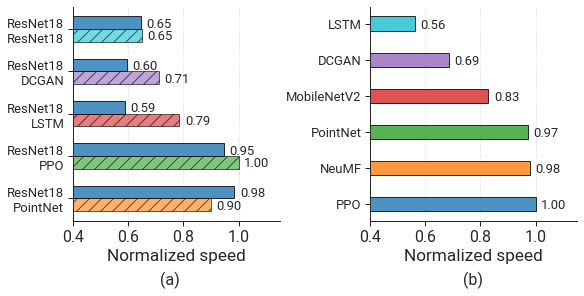

In [12]:
# batchsize = 64, amp = 0
def pairsv2(save=False):
    grid_params=dict(width_ratios=[1, 1])
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 4))
    speed = pd.read_csv(f"./resnet18_colocate.csv", index_col=None)
    speed_self = pd.read_csv(f"./selfcolocate.csv", index_col=None)

    for i in range(len(speed)):
        if speed.loc[i, 'speed1'] > 1:
            speed.loc[i, 'speed1'] = 1
        if speed.loc[i, 'speed2'] > 1:
            speed.loc[i, 'speed2'] = 1

    for i in range(len(speed_self)):
        if speed_self.loc[i, 'speed1'] > 1:
            speed_self.loc[i, 'speed1'] = 1
        if speed_self.loc[i, 'speed2'] > 1:
            speed_self.loc[i, 'speed2'] = 1

    y = np.arange(1, 6)
    width = 0.3

    p1 = ax1.barh(y + width/2, speed['speed1'], height=width, alpha=0.8, linewidth=1, edgecolor="k", 
        color=[cmp[0]])
    p2 = ax1.barh(y - width/2, speed['speed2'], height=width, alpha=0.6, linewidth=1, edgecolor="k", hatch="//",
        color=[cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])


    yticklabel = speed['model1']+'\n'+speed['model2']
    #ax.set_ylabel(f"Colocated models")
    ax1.set_yticks(y)
    ax1.set_yticklabels(yticklabel, fontsize=13)
    # ax.invert_yaxis()
    ax1.set_xlabel(f"Normalized speed")
    ax1.set_xlim(0.4, 1.15)
    autolabel_h(p1, ax1)
    autolabel_h(p2, ax1)
    sns.despine()

    ax1.grid(axis="x", linestyle=":")

    A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")
    B = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Speed2")

    # legend1 = ax1.legend(
    #     loc=0,
    #     # handles=[A, B],
    #     bbox_to_anchor=(1, 1),
    #     ncol=1,
    #     frameon=True,
    #     fancybox=True,
    #     shadow=True,
    #     fontsize=12,
    # )

    y = np.arange(1, 7)
    width = 0.4
    p3 = ax2.barh(y, speed_self['speed1'], height=width, alpha=0.8, linewidth=1, edgecolor="k", 
        color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])

    yticklabel = speed_self['model1']
    #ax.set_ylabel(f"Colocated models")
    ax2.set_yticks(y)
    ax2.set_yticklabels(yticklabel, fontsize=13)
    # ax.invert_yaxis()
    ax2.set_xlabel(f"Normalized speed")
    ax2.set_xlim(0.4, 1.15)
    autolabel_h(p3, ax2)
    sns.despine()

    ax2.grid(axis="x", linestyle=":")

    # A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")

    legend1 = ax2.legend(
        loc=0,
        # handles=[A],
        bbox_to_anchor=(1, 1),
        ncol=1,
        frameon=False,
        fancybox=True,
        shadow=True,
        fontsize=12,
    )

    ax1.text(0.42, -0.3, "(a)", transform=ax1.transAxes, size=16)
    ax2.text(0.45, -0.3, "(b)", transform=ax2.transAxes, size=16)

    if save:
        fig.savefig(f"{SAVEPATH}/pairsv2.pdf", bbox_inches="tight")

pairsv2(save=True)

# Figure combinations

4 figure combine

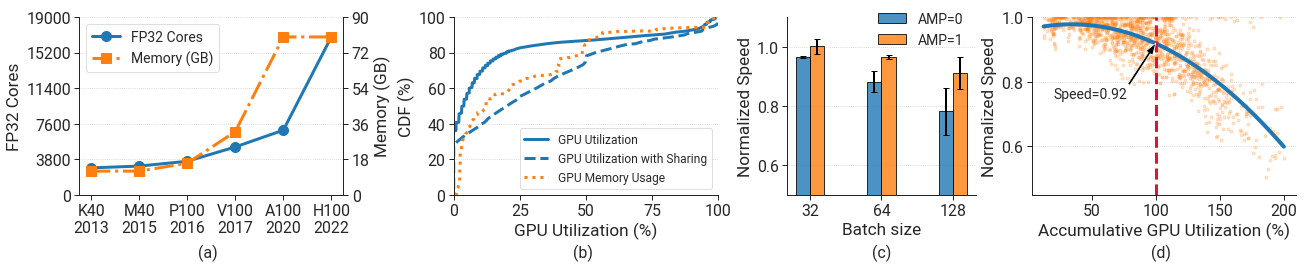

In [275]:
# def trace_analysis(save=False):
grid_params=dict(width_ratios=[1.4, 1.4, 1, 1.4])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(18, 3.6))

### Figure 1
df = pd.read_csv('./gpu.csv', index_col=0)
sm = df['FP32 Cores']
memory_cap = df['Memory (GB)']

x = np.arange(1, 7)
lns1 = ax1.plot(x, sm, label=df.columns[2], marker="o", linewidth=3, linestyle='-')
ax1.set_ylabel(f"FP32 Cores")
# ax.set_yticks([0, 3750, 7500, 11250, 15000])
ax1.set_yticks(np.linspace(0, 19000, 6))
ax1.set_ylim(0, 19000)

ticklabel = ['K40\n2013', 'M40\n2015', 'P100\n2016', 'V100\n2017', 'A100\n2020', 'H100\n2022']
ax1.set_xticks(x)
ax1.set_xticklabels(ticklabel)
# ax.set_yscale("log")

ax1.grid(axis="y", linestyle=":")

ax_11 = ax1.twinx()
lns2 = ax_11.plot(x, memory_cap, label=df.columns[1], color=cmp[1], marker="s", linewidth=3, linestyle="-.")
ax_11.set_ylabel(f"Memory (GB)")
ax_11.set_ylim(0, 90)
ax_11.set_yticks(np.linspace(0, 90, 6))

# Combine plot labels
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2, fontsize=14)
ax1.spines['top'].set_visible(False)
ax_11.spines['top'].set_visible(False)
# sns.despine(top=True,right=False, left=False, bottom=False,)

### Figure 2
df = pd.read_csv('./trace.csv')
ali_share = df.loc[:, ['ali_share_x', 'ali_share_y']].dropna()
ali_gmem = df.loc[:, ['ali_gpumem_x', 'ali_gpumem_y']].dropna()
ali_gutil = df.loc[:, ['ali_gpuutil_x', 'ali_gpuutil_y']].dropna()
msft_8 = df.loc[:, ['msft_8gpu_x', 'msft_8gpu_y']].dropna()
msft_16 = df.loc[:, ['msft_16gpu_x', 'msft_16gpu_y']].dropna()

ax2.plot(ali_gutil['ali_gpuutil_x'], ali_gutil['ali_gpuutil_y'], label='GPU Utilization', linewidth=3, color=cmp[0])
ax2.plot(ali_share['ali_share_x'], ali_share['ali_share_y'], label='GPU Utilization with Sharing', linewidth=3, linestyle='--', color=cmp[0])
ax2.plot(ali_gmem['ali_gpumem_x'], ali_gmem['ali_gpumem_y'], label='GPU Memory Usage', linewidth=3, linestyle=':', color=cmp[1])

ax2.set_xlabel(f"Resource Utilization (%)")
ax2.set_ylabel(f"CDF (%)")
ax2.set_ylim(0, 100)
# ax1.set_xticks()
ax2.set_xlim(0, 100)
ax2.set_xticks(ax2.get_xticks().tolist())
# ax1.set_xticklabels([0, 20, 40, 60, 80, 100])
ax2.grid(axis="y", linestyle=":")
ax2.legend(loc=0, fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# sns.despine()

speed = pd.read_csv(f"./bs_amp_affect.csv", index_col=0)
s_amp0 = speed[speed['amp']==0].copy()
s_amp1 = speed[speed['amp']==1].copy()

### Figure 3
x = np.arange(1, 4)
width = 0.2
error_params=dict(elinewidth=2, ecolor='k', capsize=3)
p1 = ax3.bar(x - width/2, s_amp0.loc[:,'mean_s'], yerr=abs(s_amp0['avg_s1']-s_amp0['avg_s2']), error_kw=error_params, width=width, label='AMP=0', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
p2 = ax3.bar(x + width/2, s_amp1.loc[:,'mean_s'], yerr=abs(s_amp1['avg_s1']-s_amp1['avg_s2']), error_kw=error_params, width=width, label='AMP=1', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

ax3.set_ylabel(f"Normalized Speed")
ax3.set_xticks(x)
ax3.set_xlabel(f"Batch size")
ax3.set_xticklabels(s_amp1['batchsize'])
ax3.set_ylim(0.5, 1.1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
# autolabel(p1, ax)
# autolabel(p2, ax)
# sns.despine()
ax3.grid(axis="y", linestyle=":")
legend1 = ax3.legend(
    loc=1,
    # handles=[A, B],
    bbox_to_anchor=(1, 1.1),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

### Figure 4
speed = pd.read_csv(f"/home/mzhang/work/SC/collect_metric/result/colocate_info.csv", index_col=None)

for i in range(len(speed)):
    if speed.loc[i, 'speed1'] > 1:
        speed.loc[i, 'speed1'] = 1
    if speed.loc[i, 'speed2'] > 1:
        speed.loc[i, 'speed2'] = 1

x = speed['added_util']
avg_speed = (speed['speed1'] + speed['speed2']) / 2
parameter = np.polyfit(x, avg_speed, 2)
y = parameter[0] * x ** 2 + parameter[1] * x + parameter[2]
# legend1 = ax4.legend(
# #     loc=0,
# #     # handles=[A],
# #     bbox_to_anchor=(1, 1),
# #     ncol=1,
# #     frameon=False,
# #     fancybox=True,
# #     shadow=True,
# #     fontsize=12,
# # )
width = 0.2
p1 = ax4.scatter(x, avg_speed, s=40, alpha=0.2, color=cmp[1], marker='.')
p2 = ax4.plot(x, y, linewidth=4, color=cmp[0])

ax4.set_ylabel(f"Normalized Speed")
ax4.set_xlabel(f"Accumulative GPU Utilization (%)")
ax4.set_ylim(0.45, 1)
ax4.axvline(x=100, ls='--', c='crimson')
ax4.annotate("Speed=0.92", xy=(100, 0.92), xytext = (20, 0.75), arrowprops=dict(facecolor='black', width=2.5, headwidth=8), fontsize=14)
ax4.grid(axis="y", linestyle=":")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)


# # Figure4 & 5
# speed = pd.read_csv(f"./resnet18_colocate.csv", index_col=None)
# speed_self = pd.read_csv(f"./selfcolocate.csv", index_col=None)

# for i in range(len(speed)):
#     if speed.loc[i, 'speed1'] > 1:
#         speed.loc[i, 'speed1'] = 1
#     if speed.loc[i, 'speed2'] > 1:
#         speed.loc[i, 'speed2'] = 1

# for i in range(len(speed_self)):
#     if speed_self.loc[i, 'speed1'] > 1:
#         speed_self.loc[i, 'speed1'] = 1
#     if speed_self.loc[i, 'speed2'] > 1:
#         speed_self.loc[i, 'speed2'] = 1

# y = np.arange(1, 6)
# width = 0.3
# p1 = ax4.barh(y + width/2, speed['speed1'], height=width, label='Speed1', alpha=0.8, linewidth=1, edgecolor="k", 
#     color=[cmp[0]])
# p2 = ax4.barh(y - width/2, speed['speed2'], height=width, label='Speed2', alpha=0.6, linewidth=1, edgecolor="k", hatch="//",
#     color=[cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])

# yticklabel = speed['model1']+'\n'+speed['model2']
# #ax.set_ylabel(f"Colocated models")
# ax4.set_yticks(y)
# ax4.set_yticklabels(yticklabel, fontsize=13)
# # ax.invert_yaxis()
# ax4.set_xlabel(f"Normalized speed")
# ax4.set_xlim(0.4, 1.15)
# autolabel_h(p1, ax4)
# autolabel_h(p2, ax4)
# sns.despine()
# ax4.grid(axis="x", linestyle=":")
# A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")
# B = mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Speed2")

# legend1 = ax4.legend(
#     loc=0,
#     handles=[A, B],
#     bbox_to_anchor=(0.6, 1),
#     ncol=1,
#     frameon=True,
#     fancybox=True,
#     shadow=True,
#     fontsize=11,
# )

# y = np.arange(1, 7)
# width = 0.4
# p3 = ax5.barh(y, speed_self['speed1'], height=width, alpha=0.8, linewidth=1, edgecolor="k", 
#     color=[cmp[0],cmp[1],cmp[2],cmp[3],cmp[4],cmp[9]])

# yticklabel = speed_self['model1']
# #ax.set_ylabel(f"Colocated models")
# ax5.set_yticks(y)
# ax5.set_yticklabels(yticklabel, fontsize=13)
# # ax.invert_yaxis()
# ax5.set_xlabel(f"Normalized speed")
# ax5.set_xlim(0.4, 1.15)
# autolabel_h(p3, ax5)
# sns.despine()
# ax5.grid(axis="x", linestyle=":")

# # A = mpatches.Patch(facecolor="white", edgecolor="black", label="Speed1")

# legend1 = ax5.legend(
#     loc=0,
#     # handles=[A],
#     bbox_to_anchor=(1, 1),
#     ncol=1,
#     frameon=False,
#     fancybox=True,
#     shadow=True,
#     fontsize=12,
# )

ax1.text(0.45, -0.35, "(a)", transform=ax1.transAxes, size=16)
ax2.text(0.45, -0.35, "(b)", transform=ax2.transAxes, size=16)
ax3.text(0.45, -0.35, "(c)", transform=ax3.transAxes, size=16)
ax4.text(0.45, -0.35, "(d)", transform=ax4.transAxes, size=16)
# ax5.text(0.45, -0.35, "(e)", transform=ax5.transAxes, size=16)

save = True
if save:
    fig.savefig(f"{SAVEPATH}/4combine.pdf", bbox_inches="tight")


# trace_analysis(save=False)

gpuinfo + trace

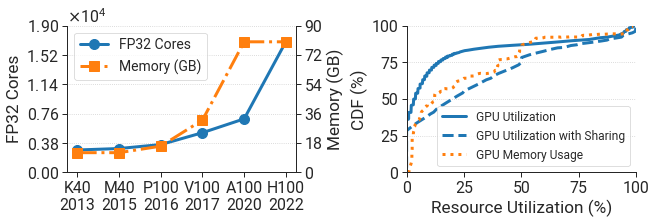

In [32]:
# def trace_analysis(save=False):
grid_params=dict(width_ratios=[1, 1])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(9, 3))

### Figure 1
df = pd.read_csv('./gpu.csv', index_col=0)
sm = df['FP32 Cores']
memory_cap = df['Memory (GB)']

x = np.arange(1, 7)
lns1 = ax1.plot(x, sm, label=df.columns[2], marker="o", linewidth=3, linestyle='-')
ax1.set_ylabel(f"FP32 Cores")
# ax.set_yticks([0, 3750, 7500, 11250, 15000])
ax1.set_yticks(np.linspace(0, 19000, 6))
ax1.set_ylim(0, 19000)
ax1.ticklabel_format(style='sci', scilimits=(0,1), axis='y', useMathText=True)

ticklabel = ['K40\n2013', 'M40\n2015', 'P100\n2016', 'V100\n2017', 'A100\n2020', 'H100\n2022']
ax1.set_xticks(x)
ax1.set_xticklabels(ticklabel)
# ax.set_yscale("log")

ax1.grid(axis="y", linestyle=":")

ax_11 = ax1.twinx()
lns2 = ax_11.plot(x, memory_cap, label=df.columns[1], color=cmp[1], marker="s", linewidth=3, linestyle="-.")
ax_11.set_ylabel(f"Memory (GB)")
ax_11.set_ylim(0, 90)
ax_11.set_yticks(np.linspace(0, 90, 6))

# Combine plot labels
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2, fontsize=14)
ax1.spines['top'].set_visible(False)
ax_11.spines['top'].set_visible(False)
# sns.despine(top=True,right=False, left=False, bottom=False,)

### Figure 2
df = pd.read_csv('./trace.csv')
ali_share = df.loc[:, ['ali_share_x', 'ali_share_y']].dropna()
ali_gmem = df.loc[:, ['ali_gpumem_x', 'ali_gpumem_y']].dropna()
ali_gutil = df.loc[:, ['ali_gpuutil_x', 'ali_gpuutil_y']].dropna()
msft_8 = df.loc[:, ['msft_8gpu_x', 'msft_8gpu_y']].dropna()
msft_16 = df.loc[:, ['msft_16gpu_x', 'msft_16gpu_y']].dropna()

ax2.plot(ali_gutil['ali_gpuutil_x'], ali_gutil['ali_gpuutil_y'], label='GPU Utilization', linewidth=3, color=cmp[0])
ax2.plot(ali_share['ali_share_x'], ali_share['ali_share_y'], label='GPU Utilization with Sharing', linewidth=3, linestyle='--', color=cmp[0])
ax2.plot(ali_gmem['ali_gpumem_x'], ali_gmem['ali_gpumem_y'], label='GPU Memory Usage', linewidth=3, linestyle=':', color=cmp[1])

ax2.set_xlabel(f"Resource Utilization (%)")
ax2.set_ylabel(f"CDF (%)")
ax2.set_ylim(0, 100)
# ax1.set_xticks()
ax2.set_xlim(0, 100)
ax2.set_xticks(ax2.get_xticks().tolist())
# ax1.set_xticklabels([0, 20, 40, 60, 80, 100])
ax2.grid(axis="y", linestyle=":")
ax2.legend(loc=0, fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# sns.despine()

speed = pd.read_csv(f"./bs_amp_affect.csv", index_col=0)
s_amp0 = speed[speed['amp']==0].copy()
s_amp1 = speed[speed['amp']==1].copy()

useMathText=True
save = True
if save:
    fig.savefig(f"{SAVEPATH}/bsamp+scatter.pdf", bbox_inches="tight")


bsamp + scatter

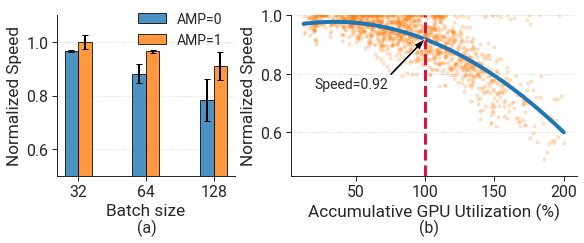

In [17]:
# def trace_analysis(save=False):
grid_params=dict(width_ratios=[1, 1.6])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.2))

### Figure 1
speed = pd.read_csv(f"./bs_amp_affect.csv", index_col=0)
s_amp0 = speed[speed['amp']==0].copy()
s_amp1 = speed[speed['amp']==1].copy()

x = np.arange(1, 4)
width = 0.2
error_params=dict(elinewidth=2, ecolor='k', capsize=3)
p1 = ax1.bar(x - width/2, s_amp0.loc[:,'mean_s'], yerr=abs(s_amp0['avg_s1']-s_amp0['avg_s2']), error_kw=error_params, width=width, label='AMP=0', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
p2 = ax1.bar(x + width/2, s_amp1.loc[:,'mean_s'], yerr=abs(s_amp1['avg_s1']-s_amp1['avg_s2']), error_kw=error_params, width=width, label='AMP=1', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

ax1.set_ylabel(f"Normalized Speed")
ax1.set_xticks(x)
ax1.set_xlabel(f"Batch size")
ax1.set_xticklabels(s_amp1['batchsize'])
ax1.set_ylim(0.5, 1.1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# autolabel(p1, ax)
# autolabel(p2, ax)
# sns.despine()
ax1.grid(axis="y", linestyle=":")
legend1 = ax1.legend(
    loc=1,
    # handles=[A, B],
    bbox_to_anchor=(1, 1.1),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

### Figure 2
speed = pd.read_csv(f"/home/mzhang/work/SC/collect_metric/result/colocate_info.csv", index_col=None)

for i in range(len(speed)):
    if speed.loc[i, 'speed1'] > 1:
        speed.loc[i, 'speed1'] = 1
    if speed.loc[i, 'speed2'] > 1:
        speed.loc[i, 'speed2'] = 1

x = speed['added_util']
avg_speed = (speed['speed1'] + speed['speed2']) / 2
parameter = np.polyfit(x, avg_speed, 2)
y = parameter[0] * x ** 2 + parameter[1] * x + parameter[2]
# legend1 = ax4.legend(
# #     loc=0,
# #     # handles=[A],
# #     bbox_to_anchor=(1, 1),
# #     ncol=1,
# #     frameon=False,
# #     fancybox=True,
# #     shadow=True,
# #     fontsize=12,
# # )
width = 0.2
p1 = ax2.scatter(x, avg_speed, s=40, alpha=0.2, color=cmp[1], marker='.')
p2 = ax2.plot(x, y, linewidth=4, color=cmp[0])

ax2.set_ylabel(f"Normalized Speed")
ax2.set_xlabel(f"Accumulative GPU Utilization (%)")
ax2.set_ylim(0.45, 1)
ax2.axvline(x=100, ls='--', c='crimson')
ax2.annotate("Speed=0.92", xy=(100, 0.92), xytext = (20, 0.75), arrowprops=dict(facecolor='black', width=2.5, headwidth=8), fontsize=14)
ax2.grid(axis="y", linestyle=":")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.text(0.45, -0.35, "(a)", transform=ax1.transAxes, size=16)
ax2.text(0.45, -0.35, "(b)", transform=ax2.transAxes, size=16)
# ax5.text(0.45, -0.35, "(e)", transform=ax5.transAxes, size=16)

save = False
if save:
    fig.savefig(f"{SAVEPATH}/bsamp+scatter.pdf", bbox_inches="tight")


# Three job colocate 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


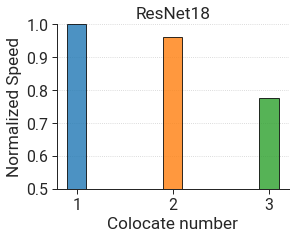

In [13]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# batchsize = 64
SAVEPATH = '.'
cmp = sns.color_palette("tab10")
def tripple(save=False):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4, 3.2))
    speed = pd.read_csv(f"./colocate3.csv", index_col=None)
    s = []
    s.append(speed.loc[1, 'single_s'])
    s.append(speed.loc[1, 'co2_s1': 'co2_s2'].mean())
    s.append(speed.loc[1, 'co3_s1': 'co3_s3'].mean())

    x = np.arange(1, 4)
    width = 0.2
    # error_params=dict(elinewidth=2, ecolor='k', capsize=3)
    # p1 = ax.bar(x - width/2, s_amp0.loc[:,'mean_s'], yerr=abs(s_amp0['avg_s1']-s_amp0['avg_s2']), error_kw=error_params, width=width, label='amp=0', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
    p1 = ax.bar(x, s, width=width, alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0], cmp[1], cmp[2]])

    ax.set_ylabel(f"Normalized Speed")
    ax.set_xticks(x)
    ax.set_xlabel(f"Colocate number")
    # ax.set_xticklabels(s_amp1['batchsize'])
    ax.set_ylim(0.5, 1)
    ax.set_title('ResNet18')
    
    sns.despine()

    ax.grid(axis="y", linestyle=":")

    legend1 = ax.legend(
        loc=1,
        # handles=[A, B],
        bbox_to_anchor=(1, 1.1),
        ncol=1,
        frameon=False,
        fancybox=True,
        shadow=True,
        fontsize=14,
    )

    if save:
        fig.savefig(f"{SAVEPATH}/colocate3.pdf", bbox_inches="tight")

tripple(save=False)

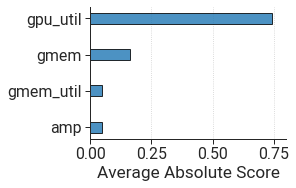

In [10]:
def clara_global(n_features=4, save=False):
    fig, ax = plt.subplots(
        ncols=1, nrows=1, constrained_layout=True, figsize=(4, 2.5)
    )
    
    sorted_score = [0.7408843, 0.16366116, 0.04772727, 0.04772727]
    sorted_feature = ['gpu_util', 'gmem', 'gmem_util', 'amp']
    n_features = n_features
    x = np.arange(1, n_features+1)

    width = 0.3
    ax.barh(x[::-1], sorted_score[:n_features], height=width, label=sorted_feature[:n_features], alpha=0.8, linewidth=1, edgecolor="k")
    
    ax.set_xlim(0, 0.8)
    ax.set_yticks(x)
    ax.set_xticks([0, 0.25, 0.5, 0.75])
    ax.set_yticklabels(sorted_feature[:n_features][::-1])
    ax.set_xlabel(f"Average Absolute Score")
    ax.grid(axis="x", linestyle=":")
    sns.despine()

    if save:
        fig.savefig(f"{SAVEPATH}/Clara_Global.svg", bbox_inches="tight")


clara_global(n_features=4, save=False)

# Accumulated GPU utilization vs speed scatter

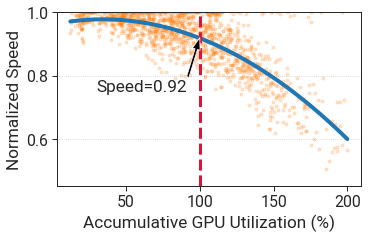

In [78]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import numpy as np

# batchsize = 64
SAVEPATH = '.'
cmp = sns.color_palette("tab10")
def utilscatter(save=False):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5, 3.2))
    speed = pd.read_csv(f"/home/mzhang/work/SC/collect_metric/result/colocate_info.csv", index_col=None)
   
    for i in range(len(speed)):
        if speed.loc[i, 'speed1'] > 1:
            speed.loc[i, 'speed1'] = 1
        if speed.loc[i, 'speed2'] > 1:
            speed.loc[i, 'speed2'] = 1
    
    x = speed['added_util']
    avg_speed = (speed['speed1'] + speed['speed2']) / 2
    parameter = np.polyfit(x, avg_speed, 2)
    y = parameter[0] * x ** 2 + parameter[1] * x + parameter[2]
    width = 0.2
    p1 = ax.scatter(x, avg_speed, s=40, alpha=0.2, color=cmp[1], marker='.')
    p2 = ax.plot(x, y, linewidth=4, color=cmp[0])

    ax.set_ylabel(f"Normalized Speed")
    ax.set_xlabel(f"Accumulative GPU Utilization (%)")
    ax.set_ylim(0.45, 1)
    ax.axvline(x=100, ls='--', c='crimson')
    ax.annotate("Speed=0.92", xy=(100, 0.92), xytext = (30, 0.75), arrowprops=dict(facecolor='black', width=2.5, headwidth=8))
    

    ax.grid(axis="y", linestyle=":")

    # legend1 = ax.legend(
    #     loc=1,
    #     # handles=[A, B],
    #     bbox_to_anchor=(1, 1.1),
    #     ncol=1,
    #     frameon=False,
    #     fancybox=True,
    #     shadow=True,
    #     fontsize=14,
    # )

    if save:
        fig.savefig(f"{SAVEPATH}/gpuutilscatter_v2.pdf", bbox_inches="tight")

utilscatter(save=True)

# Policy vs queue time

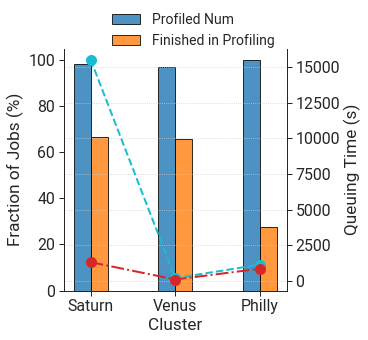

In [114]:
# batchsize = 64
SAVEPATH = '.'
cmp = sns.color_palette("tab10")
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5, 4.6))

df = pd.read_csv('./profile_num.csv', index_col=0)
x = np.arange(1, 4)
width = 0.2
p1 = ax.bar(x - width/2, df.loc[:,'profile_num'], width=width, label='Profiled Num', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
p2 = ax.bar(x + width/2, df.loc[:,'profile_finish'], width=width, label='Finished in Profiling', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

ax.set_ylabel(f"Fraction of Jobs (%)")
ax.set_xticks(x)
ax.set_xlabel(f"Cluster")
ax.set_xticklabels(df.index)
# ax.set_ylim(0.5, 1.1)

que_time = pd.read_csv(f"./policy_queuetime.csv", index_col=0)
que_time = que_time.T

ax1 = ax.twinx()
p3 = ax1.plot(x, que_time.loc[:,'FIFO'], label='FIFO', marker="o", linewidth=2, linestyle='--', color=cmp[9])
p4 = ax1.plot(x, que_time.loc[:,'LGF'], label='LGF', marker="o", linewidth=2, linestyle='-.', color=cmp[3])

ax1.set_ylabel(f"Queuing Time (s)")
# ax.set_ylim([-10000, 16000])

# autolabel(p1, ax)
# autolabel(p2, ax)
sns.despine(top=True,right=False, left=False, bottom=False,)

ax1.grid(axis="y", linestyle=":")
# lns = tuple(p1) + tuple(p2) + p3 + p4
# labels = [l.get_label() for l in lns]
legend = ax.legend(
    loc=1,
    # handles=[A, B],
    bbox_to_anchor=(1, 1.2),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)
save=False
if save:
    fig.savefig(f"{SAVEPATH}/que_time.pdf", bbox_inches="tight")

version 2

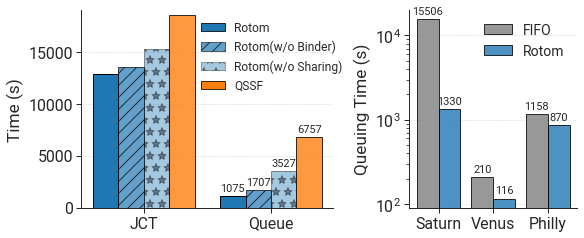

In [228]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=11,
        )

# batchsize = 64
SAVEPATH = '.'
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1.5, 1])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.2))

ablation = pd.read_csv('./ablation.csv', index_col=0)
ablation = ablation.T
x1 = np.arange(1, 2)
width = 0.2
p1 = ax1.bar(x1-1.5*width, ablation.loc['JCT', 'Rotom'], width=width, label='Rotom', alpha=1, linewidth=1, edgecolor="k", color = [cmp[0]])
p2 = ax1.bar(x1-0.5*width, ablation.loc['JCT', 'Rotom(w/o Binder)'], width=width, label='Rotom(w/o Binder)', alpha=0.7, linewidth=1, edgecolor="k", color = [cmp[0]], hatch='//')
p3 = ax1.bar(x1+0.5*width, ablation.loc['JCT', 'Rotom(Sharing Disabled)'], width=width, label='Rotom(w/o Sharing)', alpha=0.4, linewidth=1, edgecolor="k", color = [cmp[0]], hatch='*')
p4 = ax1.bar(x1+1.5*width, ablation.loc['JCT', 'QSSF'], width=width, label='QSSF', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

x2 = np.arange(2, 3)
p5 = ax1.bar(x2-1.5*width, ablation.loc['Queue', 'Rotom'], width=width, label='Rotom', alpha=1, linewidth=1, edgecolor="k", color = [cmp[0]])
p6 = ax1.bar(x2-0.5*width, ablation.loc['Queue', 'Rotom(w/o Binder)'], width=width, label='Rotom(w/o Binder)', alpha=0.7, linewidth=1, edgecolor="k", color = [cmp[0]], hatch='//')
p7 = ax1.bar(x2+0.5*width, ablation.loc['Queue', 'Rotom(Sharing Disabled)'], width=width, label='Rotom(w/o Sharing)', alpha=0.4, linewidth=1, edgecolor="k", color = [cmp[0]], hatch='*')
p8 = ax1.bar(x2+1.5*width, ablation.loc['Queue', 'QSSF'], width=width, label='QSSF', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

autolabel(p5, ax1)
autolabel(p6, ax1)
autolabel(p7, ax1)
autolabel(p8, ax1)

ax1.set_ylabel(f"Time (s)")
ax1.set_ylim(0, 19000)
ax1.set_xticks(np.arange(1,3))
ax1.set_xticklabels(ablation.index)
ax1.grid(axis="y", linestyle=":")

A = mpatches.Patch(facecolor=cmp[0], alpha=1, edgecolor="black", label="Rotom")
B = mpatches.Patch(facecolor=cmp[0], alpha=0.7, edgecolor="black", hatch="//", label="Rotom(w/o Binder)")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.4, edgecolor="black", hatch="*", label="Rotom(w/o Sharing)")
D = mpatches.Patch(facecolor=cmp[1], alpha=1, edgecolor="black", label="QSSF")
legend = ax1.legend(
    loc=1,
    handles=[A, B, C, D],
    bbox_to_anchor=(1.08, 1),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=12,
)

df = pd.read_csv('./policy_queuetime.csv', index_col=0)
df = df.T
x = np.arange(1, 4)
width = 0.4
p1 = ax2.bar(x - width/2, df.loc[:,'FIFO'], width=width, label='FIFO', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[-3]])
p2 = ax2.bar(x + width/2, df.loc[:,'LGF'], width=width, label='Rotom', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

autolabel(p1, ax2)
autolabel(p2, ax2)

ax2.set_ylabel(f"Queuing Time (s)")
ax2.set_yscale('log')
ax2.set_xticks(x)
# ax2.set_xlabel(f"Cluster")
ax2.set_xticklabels(df.index)
# ax.set_ylim(0.5, 1.1)

ax2.grid(axis="y", linestyle=":")
# lns = tuple(p1) + tuple(p2) + p3 + p4
# labels = [l.get_label() for l in lns]
legend = ax2.legend(
    loc=1,
    # handles=[A, B],
    bbox_to_anchor=(1, 1),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)
sns.despine()
save=True
if save:
    fig.savefig(f"{SAVEPATH}/ablation.pdf", bbox_inches="tight")

In [158]:
ablation = ablation.T
ablation

,Rotom,Rotom(w/o Binder),Rotom(Sharing Disabled),QSSF
JCT,12916,13547,15250,18526
Queue,1075,1707,3527,6757


In [201]:
import time 

start = time.time()

a = np.random.randn(1, 2048)
a = list(a)
a.sort()

print(f'tima pass: {time.time() - start}')

tima pass: 0.0021724700927734375
